### Task 4 – Decompose and reduction

From the qasm 3.0 code, make a decomposition in which only the gates of the clifford+T group remain, and then identify if the number of gates can be reduced, e.g.

What can the following quantum circuits be reduced to?

The gates you need to consider are RX, RY, RZ,  CCX,  and reduce them if exist the case.




In [1]:
# [rz](https://qiskit.org/textbook/ch-gates/more-circuit-identities.html#5.-Arbitrary-rotations-from-H-and-T-)

In [2]:
from qiskit import QuantumCircuit
from math import pi, e
from qiskit.quantum_info import Operator

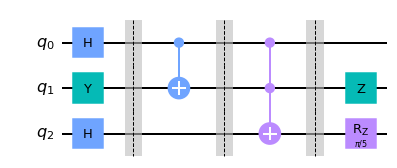

In [3]:
qc = QuantumCircuit(3)
qc.h(0)
qc.y(1)
qc.h(2)
qc.barrier()
qc.cx(0,1)
qc.barrier()
qc.ccx(0,1,2)
qc.barrier()
qc.z(1)
qc.rz(pi/5, 2)

qc.draw('mpl')

In [4]:
circuit1 = Operator(qc)
print(circuit1)

Operator([[ 0.       +0.j        ,  0.       +0.j        ,
           -0.1545085-0.47552826j, -0.1545085-0.47552826j,
            0.       +0.j        ,  0.       +0.j        ,
           -0.1545085-0.47552826j, -0.1545085-0.47552826j],
          [ 0.1545085+0.47552826j, -0.1545085-0.47552826j,
            0.       +0.j        ,  0.       +0.j        ,
            0.1545085+0.47552826j, -0.1545085-0.47552826j,
            0.       +0.j        ,  0.       +0.j        ],
          [-0.1545085-0.47552826j, -0.1545085-0.47552826j,
            0.       +0.j        ,  0.       +0.j        ,
           -0.1545085-0.47552826j, -0.1545085-0.47552826j,
            0.       +0.j        ,  0.       +0.j        ],
          [ 0.       +0.j        ,  0.       +0.j        ,
            0.1545085+0.47552826j, -0.1545085-0.47552826j,
            0.       +0.j        ,  0.       +0.j        ,
           -0.1545085-0.47552826j,  0.1545085+0.47552826j],
          [ 0.       +0.j        ,  0.       +0.j   

We know that the clifford gates are H, S, Z, CNOT and from the task description we have to decompose all gates into a combination of these gates. 

Some Relations

1. TT = S
2. SS = TTTT = Z

So we can reduce gates using these relations

[More on Clifford gates](https://github.com/developer-student-club-thapar/Quantum-Computing/blob/main/4.%20Multi-Qubit%20Gates/e.%20Universality.ipynb)

#### Before Barrier 1
| Qubit | Gate | Decomposition |
| :- | -: | -: |
| 0 | H | H |
| 1 | Y | SHSSHS$^{\dagger}$ |
| 2 | H | H |

[Proof Y = SHSSHS$^{\dagger}$](https://github.com/developer-student-club-thapar/Quantum-Computing/blob/main/3.%20Single%20Qubit%20Gates/c.%20universality_and_fidelity.ipynb)

#### Before Barrier 2
| Qubit | Gate | Decomposition |
| :- | -: | -: |
| 0,1 | CNOT | CNOT |

#### Before Barrier 3
| Qubit | Gate | Decomposition |
| :- | -: | -: |
| 0,1,2 | CCNOT or Toffoli | Toffoli Decomposition |

[Toffoli Decomposition](https://github.com/developer-student-club-thapar/Quantum-Computing/blob/main/4.%20Multi-Qubit%20Gates/f.%20Three%20qubit%20gates.ipynb)

#### After Barrier 3
| Qubit | Gate | Decomposition |
| :- | -: | -: |
| 1 | Z | SS |
| 2 | Rz | - |

### Decomposed Circuit

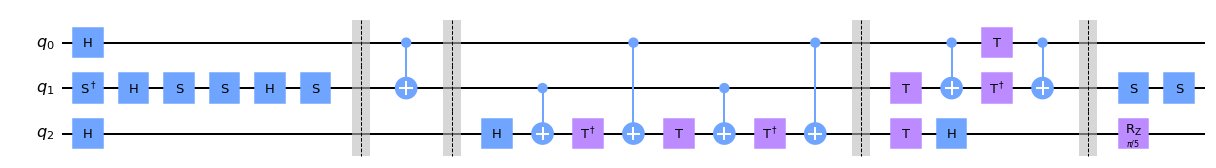

In [5]:
qc = QuantumCircuit(3)
qc.h(0)
qc.sdg(1)
qc.h(1)
qc.s(1)
qc.s(1)
qc.h(1)
qc.s(1)
qc.h(2)
qc.barrier()

qc.cx(0,1)
qc.barrier()

qc.h(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.barrier()
qc.t([1,2])
qc.cx(0,1)
qc.h(2)
qc.t(0)
qc.tdg(1)
qc.cx(0,1)
qc.barrier()

qc.s(1)
qc.s(1)
# qc.s(2)
# qc.s(2)*(e**(pi/10))
qc.rz(pi/5, 2)

qc.draw('mpl')

In [6]:
circuit2 = Operator(qc)
print(circuit2)

Operator([[ 0.       +0.j        ,  0.       +0.j        ,
           -0.1545085-0.47552826j, -0.1545085-0.47552826j,
            0.       +0.j        ,  0.       +0.j        ,
           -0.1545085-0.47552826j, -0.1545085-0.47552826j],
          [ 0.1545085+0.47552826j, -0.1545085-0.47552826j,
            0.       +0.j        ,  0.       +0.j        ,
            0.1545085+0.47552826j, -0.1545085-0.47552826j,
            0.       +0.j        ,  0.       +0.j        ],
          [-0.1545085-0.47552826j, -0.1545085-0.47552826j,
            0.       +0.j        ,  0.       +0.j        ,
           -0.1545085-0.47552826j, -0.1545085-0.47552826j,
            0.       +0.j        ,  0.       +0.j        ],
          [ 0.       +0.j        ,  0.       +0.j        ,
            0.1545085+0.47552826j, -0.1545085-0.47552826j,
            0.       +0.j        ,  0.       +0.j        ,
           -0.1545085-0.47552826j,  0.1545085+0.47552826j],
          [ 0.       +0.j        ,  0.       +0.j   

### Decomposed and reduced circuit

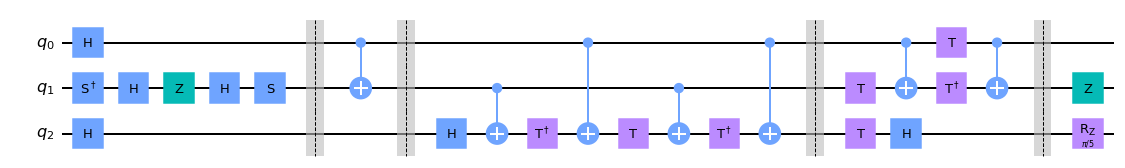

In [7]:
qc = QuantumCircuit(3)
qc.h(0)
qc.sdg(1)
qc.h(1)
qc.z(1)
qc.h(1)
qc.s(1)
qc.h(2)
qc.barrier()

qc.cx(0,1)
qc.barrier()

qc.h(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.barrier()
qc.t([1,2])
qc.cx(0,1)
qc.h(2)
qc.t(0)
qc.tdg(1)
qc.cx(0,1)
qc.barrier()

qc.z(1)
# qc.s(2)
# qc.s(2)*(e**(pi/10))
qc.rz(pi/5, 2)

qc.draw('mpl')

In [8]:
circuit3 = Operator(qc)

### Checking if the 2 circuits are equivalent using fidelity

[More on Fidelity](https://github.com/developer-student-club-thapar/Quantum-Computing/blob/main/3.%20Single%20Qubit%20Gates/c.%20universality_and_fidelity.ipynb)

In [9]:
from qiskit.quantum_info import average_gate_fidelity, process_fidelity, state_fidelity
print('Average Gate Fidelity: {}'.format(average_gate_fidelity(circuit1, circuit2)))
print('Process Fidelity: {}'.format(process_fidelity(circuit1, circuit2)))

Average Gate Fidelity: 0.999999999999998
Process Fidelity: 0.9999999999999978


In [10]:
print('Average Gate Fidelity: {}'.format(average_gate_fidelity(circuit2, circuit3)))
print('Process Fidelity: {}'.format(process_fidelity(circuit2, circuit3)))

Average Gate Fidelity: 0.999999999999997
Process Fidelity: 0.9999999999999967


Values closer to 1 indicate that the circuits are having the same effect

### In qasm

In [11]:
Qasm = qc.qasm()
print(Qasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
h q[0];
sdg q[1];
h q[1];
z q[1];
h q[1];
s q[1];
h q[2];
barrier q[0],q[1],q[2];
cx q[0],q[1];
barrier q[0],q[1],q[2];
h q[2];
cx q[1],q[2];
tdg q[2];
cx q[0],q[2];
t q[2];
cx q[1],q[2];
tdg q[2];
cx q[0],q[2];
barrier q[0],q[1],q[2];
t q[1];
t q[2];
cx q[0],q[1];
h q[2];
t q[0];
tdg q[1];
cx q[0],q[1];
barrier q[0],q[1],q[2];
z q[1];
rz(pi/5) q[2];

